# Integrated Project 1: Ice Online Store

The Ice online store sells video games worldwide. User and expert ratings, genres, platforms (eg Xbox or PlayStation) and historical data on game sales are available from open sources. In this project, patterns were identified that determine whether a game is successful or not. Allowing to identify potential big winners and plan advertising campaigns.

The data goes back to 2016. It was used to plan a campaign for 2017. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board rates a game's content and assigns an age rating, such as Teen or Mature.

# Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

In [90]:
# Setting graphics style
sns.set_theme(style="darkgrid")
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

# Reading data and general information

In [91]:
df = pd.read_csv('games.csv')

**Description of data:**
***
1. **<em>Name:</em>** (name)
2. **<em>Platform</em>** (platform)
3. **<em>Year_of_Release</em>** (Year of release)
4. **<em>Genre</em>** (gender)
5. **<em>NA_sales</em>** (North American sales in millions of USD)
6. **<em>EU_sales</em>** (European sales in millions of USD)
7. **<em>JP_sales</em>** (Japan sales in millions of USD)
8. **<em>Other_sales</em>** (sales in other countries in millions of USD)
9. **<em>Critic_Score</em>** - (Critical score) (maximum 100)
10. **<em>User_Score</em>** - (User score) (maximum of 10)
11. **<em>Rating</em>** (ESRB):
     * EC - Early Childhood (Up to 3 years old)
     * E - Everyone (Over 6 or free)
     * E10+ - Everyone 10+ (Over 10 years old)
     * T - Teen (Over 13)
     * RP - Rating Pending (Under Analysis)
     * M17+ - Mature 17+ (Over 17 years old)
     * AO - Adults only 18+ (over 18 years old)
     * KD - Kids to Adults (Over 6 years old)
    


In [92]:
# Printing first 10 lines
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [93]:
# Printing informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [94]:
# Number of lines and columns
df.shape

(16715, 11)

In [95]:
# Missing values
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [96]:
# Duplicate values
df.duplicated().sum()

0

**Conclusions**
***
Necessary modifications:

1. Standardize column names with lowercase letters.
2. Fill in the missing values in the columns:
     * Year_of_Release, Genre, Critic_Score, User_Score, User_Score
3. Correct variable typing:
     * <em>Year_of_Release</em> float -> int
     * <em>Rating</em> object -> category


# Data preparation

In [97]:
# Replace column names (change all letters to lower case)
df.columns = df.columns.str.lower()

In [98]:
# Checking result
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [99]:
# Filling critical_score column missing values with median
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)

In [100]:
# Checking result
df['critic_score'].isna().mean()

0.0

In the column <em>user_score</em> there is the string value 'tbd', which means 'to be determined'. To facilitate analysis, this value will be encoded with the value -99.00 so that functions and graphs do not generate errors because they are int and str values in the same column. I chose this path, as it is an assessment that has not yet been determined, so we cannot fill it with a central value of the sample. In this way, the extreme negative value helps me to identify as a value part of the scale from 0 to 10.

In [101]:
# Encoding the tbd variable
df["user_score"].replace('tbd', -99.00, inplace=True)

In [102]:
# Filling in values with the user score median, as the median is not affected by extreme values
df['user_score'].fillna(df['user_score'].median(), inplace=True)

In [103]:
# Checking result
df['user_score'].isna().sum()

0

In [104]:
# Filling in missing values with median year of release grouped by platforms
df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].transform('median'), inplace=True)

In [105]:
# Checking result
df['year_of_release'].isna().sum()

0

In [106]:
# Filling in missing values in the 'rating' column with the most frequent value according to genre
df['rating'] = df[df.genre.notnull()].groupby('genre')['rating'].transform(lambda x: x.fillna(x.mode()[0]))

In [107]:
# Checking result
df['rating'].isna().sum()

2

In [108]:
# Checking the lines that still remained with missing values
df.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             2
dtype: int64

In [120]:
# Saving the dataframe with lines 656 and 14244 deleted in a new variable
df_updated = df.dropna()

In [122]:
df_updated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,T
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,T
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,6.9,E
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,6.9,E


In [123]:
# Converting year_of_release variable to int type
df_updated['year_of_release'] = df_updated['year_of_release'].astype('int')

In [124]:
# Checking result
df_updated.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [125]:
# Converting user_score variable to float type
df_updated['user_score'] = df_updated['user_score'].astype('float')

In [126]:
# Checking result
df_updated.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [127]:
# Converting variable rating to type category
df_updated['rating'] = df_updated['rating'].astype('category')

In [128]:
# Checking result
df_updated.dtypes

name                 object
platform             object
year_of_release       int64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object

## Enriching the data with more information

In [129]:
# Calculating total sales for each game
df_updated['total_sales'] = df_updated[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [130]:
# Checking result
df_updated.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,T,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,6.9,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,6.9,M,28.31


# Analyze the data

**Number of games released per year**

In [131]:
# Grouping data by year and name of games. Applying count() on the name column to count how many games per year
grouped_year_name = df_updated.groupby('year_of_release')['name'].count().reset_index()
# Sorted in descending order to see the year the most games were released
grouped_year_name.sort_values(['name'], ascending=False)

,year_of_release,name
29,2009,1476
28,2008,1457
30,2010,1302
27,2007,1197
31,2011,1161
26,2006,1006
25,2005,973
22,2002,829
23,2003,800
24,2004,783


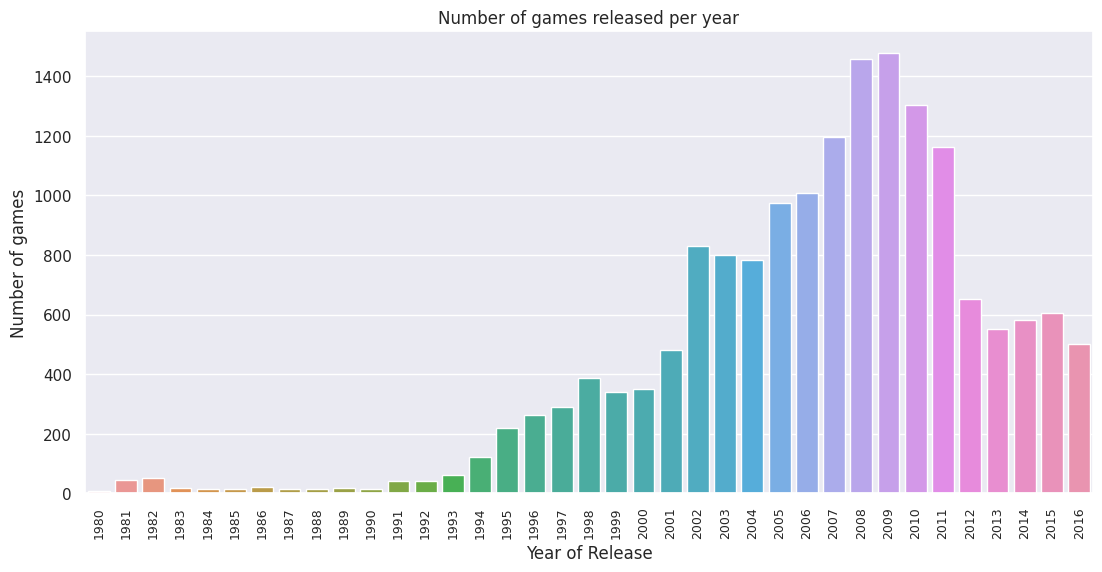

In [132]:
# Building graphical representation of game data released by year
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(x='year_of_release', y='name',  ax=ax, data= grouped_year_name);
plt.xlabel('Year of Release');
plt.ylabel('Number of games');
plt.title('Number of games released per year');
plt.xticks(rotation='vertical', fontsize=9);

There has been a greater number of games over the years, with a peak in the number of releases between 2005 and 2011.

**Description of game sales by each platform type**

In [158]:
df_updated.drop('year_range', axis=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,6.9,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,6.9,T,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,6.9,T,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,6.9,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,6.9,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,6.9,E,0.01


In [149]:
# Grouping the dataframe by platforms and adding year of release and total sales
grouped_platform_year = df_updated.groupby('platform')[['year_of_release','total_sales']].sum().reset_index()
# Sorting to view the platform with the highest sales value
grouped_platform_year.sort_values('year_of_release', ascending=False) 

,platform,year_of_release,total_sales
16,PS2,4331920,1255.77
4,DS,4319601,806.12
17,PS3,2676433,939.65
26,Wii,2651837,907.51
28,X360,2536473,971.42
19,PSP,2428561,294.05
15,PS,2391613,730.86
13,PC,1956701,259.52
29,XB,1651004,257.74
6,GBA,1646637,317.85


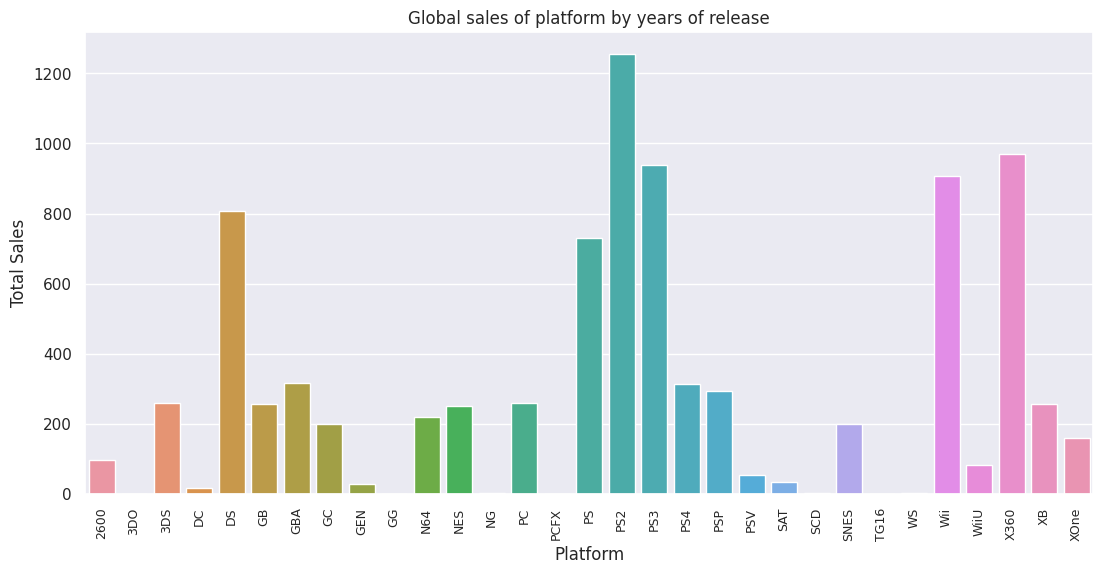

In [160]:
# Plotting the data in a bar chart
fig, ax = plt.subplots(figsize=(13,6))
sns.barplot(x='platform', y='total_sales', ax=ax, data= grouped_platform_year);
plt.xlabel('Platform');
plt.ylabel('Total Sales');
plt.title('Global sales of platform by years of release');
plt.xticks(rotation='vertical', fontsize=9);

The platforms with the highest revenues are: PS2, X360, PS3 and DS

**Most popular platforms and variations by year**

In [165]:
# Filtering the dataframe by the highest revenue platforms
df_filtered = df_updated[df_updated['platform'].isin(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PS', 'PSP'])]
grouped = df_filtered.groupby(['year_of_release', 'platform']).size().reset_index(name='counts')

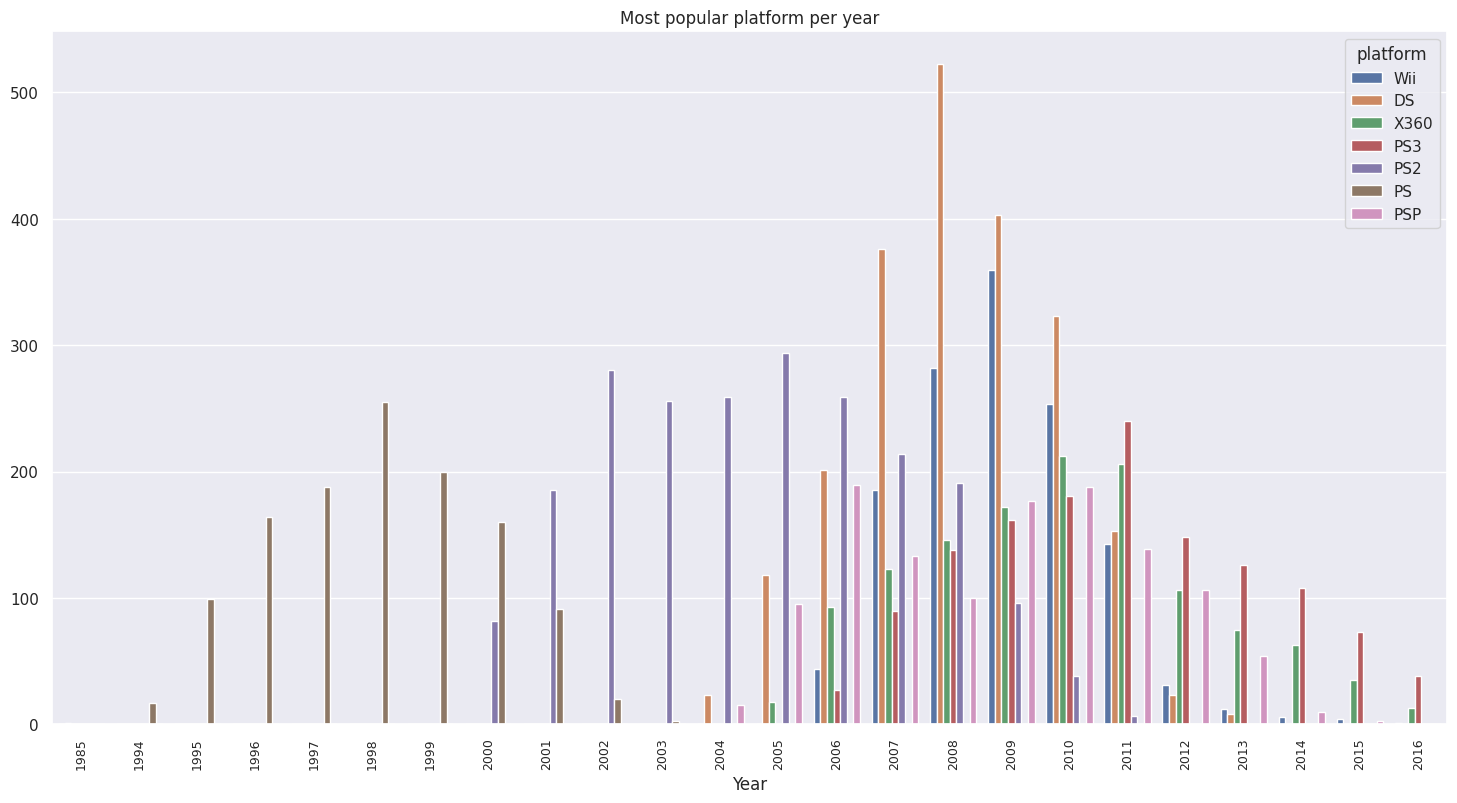

In [166]:
# Constructing platform count chart by year
fig, ax = plt.subplots(figsize=(18,9));
sns.countplot(x='year_of_release', hue='platform', ax=ax, data=df_filtered);
plt.xlabel('Year');
plt.ylabel('');
plt.title('Most popular platform per year');
plt.xticks(rotation='vertical', fontsize=9);

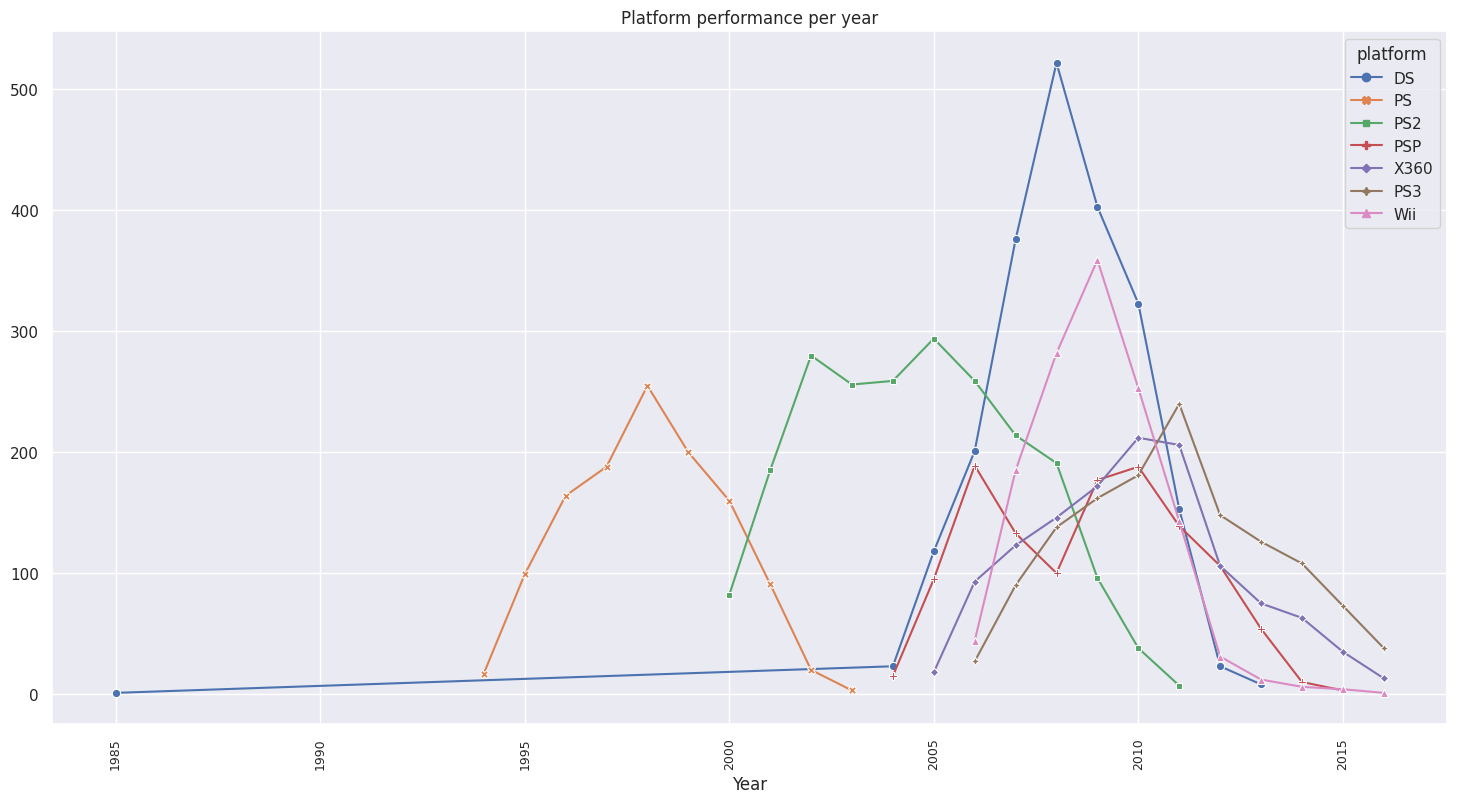

In [170]:
# Distribution of platforms based on each year
fig, ax = plt.subplots(figsize=(18,9))
sns.lineplot(x='year_of_release', y='counts', hue='platform', style='platform', markers=True, dashes=False, ax=ax, data= grouped);
plt.grid(True)
plt.xlabel('Year');
plt.ylabel('');
plt.title('Platform performance per year');
plt.xticks(rotation='vertical', fontsize=9);

**Platforms:**
* **DS**: began to increase sales in 2005, with sales peaking in 2008.
* **PS**: peaked between 1995 and 2000, but in 2004 it stopped selling.
* **PS2**: The PS2 started selling in 2000 and after 2005 sales started to decline
* **X360**: There is a lot of variation over the period from 2005 to 2009, the latter being the biggest sales peak on this platform, however after this year sales have decreased.
* **PS3**: Started selling in 2005, after sales had a significant decrease
* **Wii**: It had a sales peak in 2009 and just like the others declined.

It is interesting to note that Playstation consoles begin to show a reduction in sales as a new console is launched by the same brand.

**Building dataframe with representative years of sales and important for 2017 planning**

In [189]:
df_range_years = df_updated[(df_updated['year_of_release'] >= 2005) & (df_updated['year_of_release'] <= 2016)]

In [190]:
# Printing first 10 lines
df_range_years.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,6.9,E,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


**Variation in total sales in relation to the platforms in the chosen time**

In [191]:
# Grouping the dataframe by platforms and adding the total sales
sales_by_platform = df_range_years.groupby('platform')['total_sales'].sum().reset_index()
# Sorting
sales_by_platform.sort_values(['total_sales'], ascending=False)

,platform,total_sales
13,X360,971.42
7,PS3,939.65
11,Wii,907.51
2,DS,788.83
6,PS2,448.67
8,PS4,314.14
9,PSP,286.99
0,3DS,259.00
5,PC,171.55
15,XOne,159.32


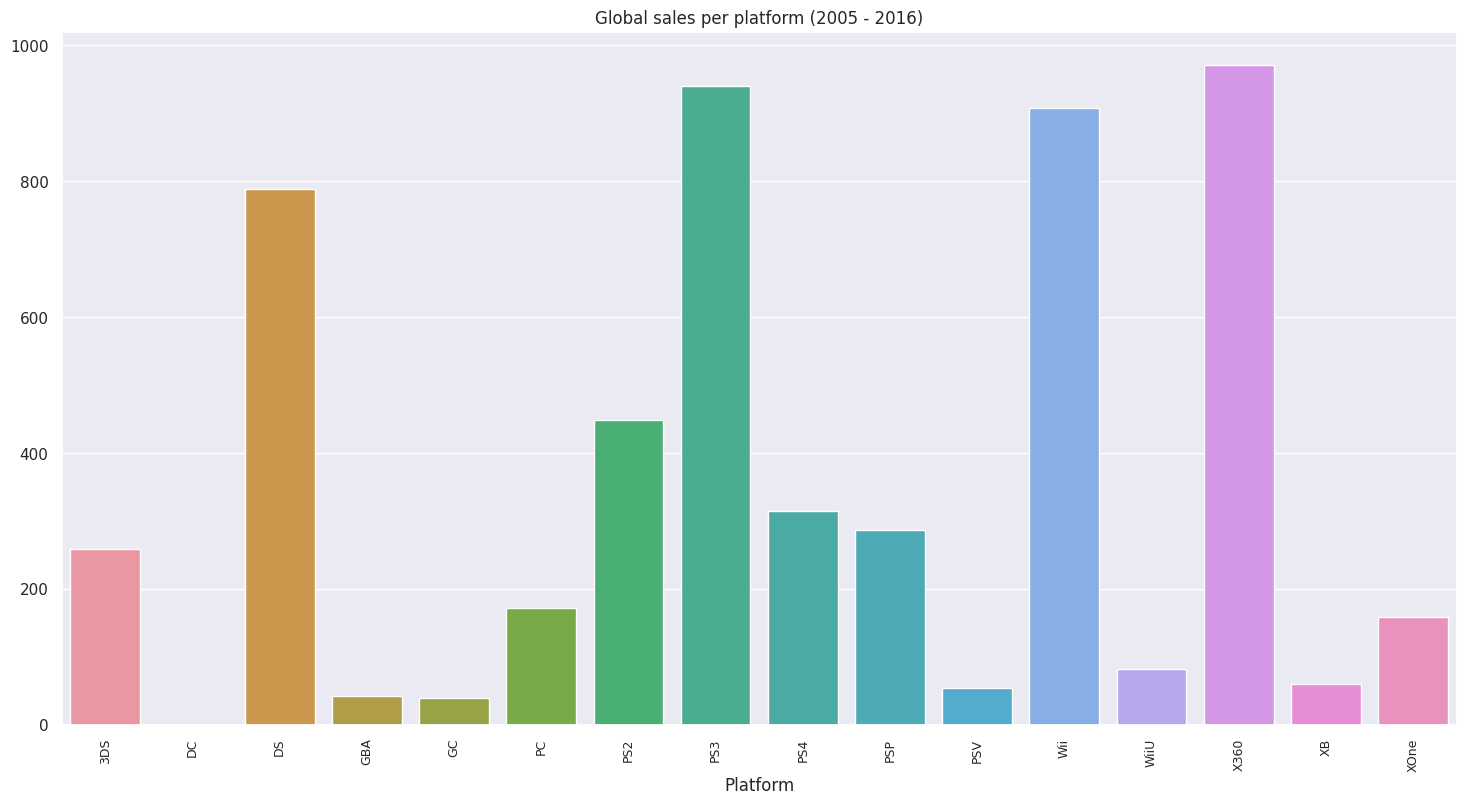

In [192]:
# Plotting graph
fig, ax = plt.subplots(figsize=(18,9))
sns.barplot(y='total_sales', x='platform', data= sales_by_platform);
plt.xlabel('Platform');
plt.ylabel('');
plt.title('Global sales per platform (2005 - 2016)');
plt.xticks(rotation='vertical', fontsize=9);

The most profitable platforms from 2005 to 2016 were: x360, PS3, PS2, WII and DS

**Sales behavior of potentially profitable platforms for each year**

In [193]:
# Grouping the dataframe by year and platform, applying the size function to count platforms and resetting the index and passing the name counts
# for column that stores platform count by year
grouped_range_years = df_range_years.query('platform in ["X360", "PS3", "Wii", "PS2", "DS"]').groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
# Sorting result
grouped_range_years.sort_values('total_sales', ascending=False)

,year_of_release,platform,total_sales
21,2009,Wii,223.30
1,2005,PS2,182.87
27,2010,X360,180.21
16,2008,Wii,171.32
30,2011,PS3,165.09
11,2007,Wii,152.77
13,2008,DS,148.65
8,2007,DS,146.94
32,2011,X360,143.84
25,2010,PS3,142.17


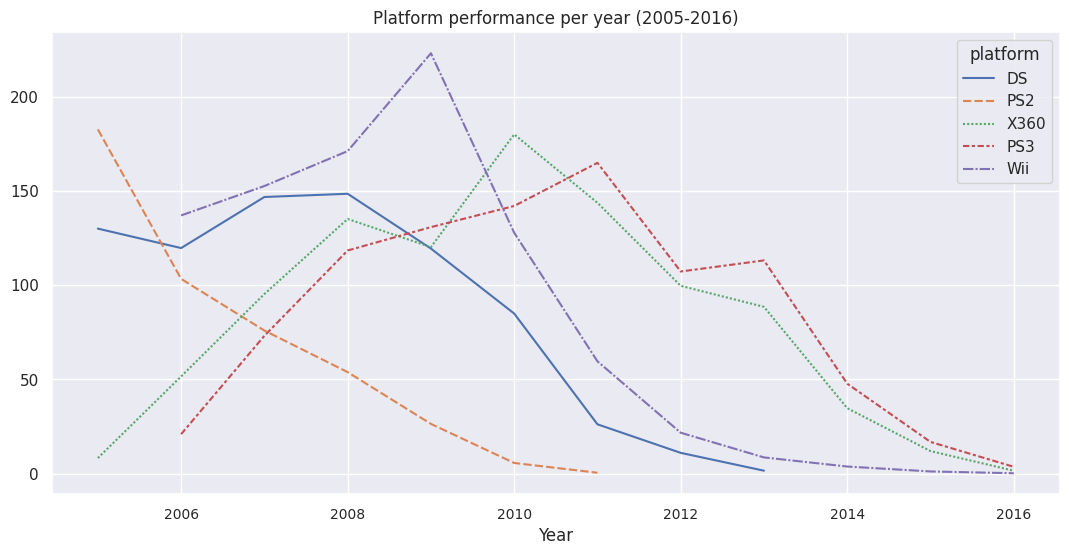

In [194]:
# Creating graph
fig, ax = plt.subplots(figsize=(13,6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform',style='platform', ax=ax, data=grouped_range_years);
plt.xlabel('Year');
plt.ylabel('');
plt.title('Platform performance per year (2005-2016)');
plt.xticks(fontsize=10);

**Platforms that continue to sell until 2016:**

* PS3: PS3 sales started to rise in 2006, with sales peaking in 2010-2011, between 2012 and 2016 it is the platform that sells the most.
* X360: In 2005 sales began to rise, with revenue in 2010, until 2016 it is the second best-selling platform.
* Wii: It was leading sales in 2006, had a sales peak in 2009 and, in 2010, began to fall. It is the last placed in the sales of 2016.

**Platforms that did not continue to sell:**

* PS2: Leading sales in 2005, but soon the PS3 platform starts to increase sales and it decreases and stops in 2011.
* DS: Showed an increase in sales until 2008, when it started to decline and since 2011 sales data for this platform no longer appears.


**Global sales of all games by platform**

In [195]:
# Grouping the data by game name, platform and total sales
grouped_game_sales = df_range_years.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
# Sorting result
grouped_game_sales.sort_values('total_sales', ascending=False)

,name,platform,total_sales
11003,Wii Sports,Wii,82.54
5585,Mario Kart Wii,Wii,35.52
11005,Wii Sports Resort,Wii,32.77
6736,New Super Mario Bros.,DS,29.80
11001,Wii Play,Wii,28.91
...,...,...,...
566,Azure Striker Gunvolt: Striker Pack,3DS,0.01
565,Azure Striker Gunvolt,3DS,0.01
2007,Deal or No Deal,PC,0.01
3353,G1 Jockey 4 2008,PS3,0.00


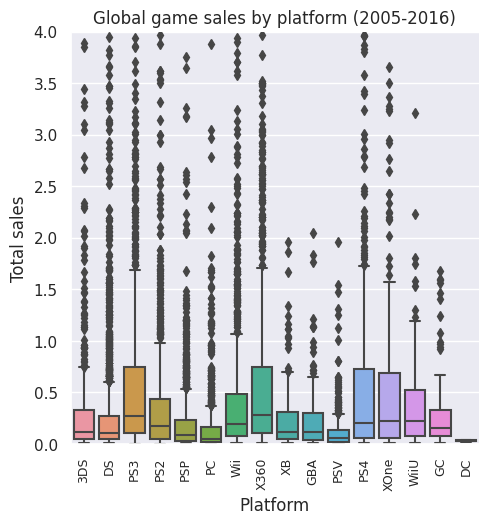

In [196]:
# Creating graph
sns.catplot( x='platform', y='total_sales', kind='box', estimator='sum', data=grouped_game_sales)
plt.xlabel('Platform');
plt.ylabel('Total sales');
plt.ylim(grouped_game_sales.total_sales.min(), 4)
plt.title('Global game sales by platform (2005-2016)');
plt.xticks(rotation='vertical', fontsize=9);

There are many outliers, but we can say that the games that sell the most are on platforms: PS3, X360, PS4, XOne

**Influence of user and professional reviews on platform sales**

In [199]:
# Filtering dataframe by most popular platforms
popular_platforms_df = df_range_years[df_range_years['platform'].isin(["X360", "PS3", "Wii", "PS2", "DS"])]
# Deleting 'tbd' ratings
popular_platforms_df = popular_platforms_df.drop(popular_platforms_df.query('user_score == -99.0').index)

In [232]:
# Checking results
popular_platforms_df.head(10)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
5,8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
6,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,6.9,E,24.67
7,11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
8,13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
9,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


**Correlation between ratings and sales:**

In [201]:
print(f'The correlation between sales and customer reviews is: {popular_platforms_df.total_sales.corr(popular_platforms_df.user_score)}')
print(f'The correlation between sales and critics rating is: {popular_platforms_df.total_sales.corr(popular_platforms_df.critic_score)}')

The correlation between sales and customer reviews is: 0.09182372245724958
The correlation between sales and critics rating is: 0.21339884760485758


In [233]:
popular_platforms_df.describe()

,index,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,7751.987567,2008.888099,0.331512,0.191226,0.067853,0.074508,69.490053,6.883304,0.665098
std,4914.616840,2.462420,1.001435,0.709325,0.294907,0.234218,10.758669,1.185889,2.039199
min,0.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,3417.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.900000,0.070000
50%,7348.500000,2009.000000,0.110000,0.020000,0.000000,0.020000,71.000000,6.900000,0.210000
75%,11976.750000,2010.000000,0.310000,0.150000,0.040000,0.060000,72.000000,7.500000,0.587500
max,16711.000000,2016.000000,41.360000,28.960000,6.500000,8.450000,98.000000,9.500000,82.540000


In [251]:
sales_user_score = popular_platforms_df.groupby('platform')[['user_score', 'total_sales']].mean()
sales_user_score

,user_score,total_sales
platform,,
DS,6.946283,0.466290
PS2,7.205230,0.428211
PS3,6.777733,0.747106
Wii,6.799886,0.917205
X360,6.722496,0.813956


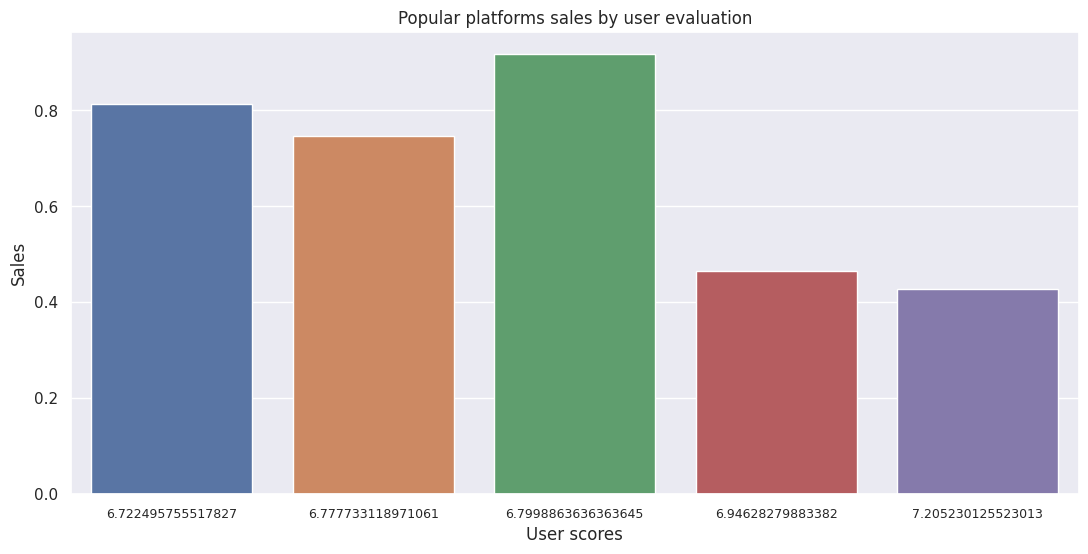

In [252]:
# Bar plot of the relationship between user ratings and sales
fig, ax= plt.subplots(figsize=(13,6))
sns.barplot( x='user_score', y='total_sales', ax=ax, data=sales_user_score)
plt.xlabel('User scores');
plt.ylabel('Sales');
plt.title('Popular platforms sales by user evaluation');
plt.xticks(rotation='horizontal', fontsize=9);

In [237]:
sales_critic_score = popular_platforms_df.groupby('platform')[['critic_score', 'total_sales']].mean()
sales_critic_score

,critic_score,total_sales
platform,,
DS,69.496356,0.466290
PS2,69.742678,0.428211
PS3,70.878617,0.747106
Wii,67.232955,0.917205
X360,69.497453,0.813956


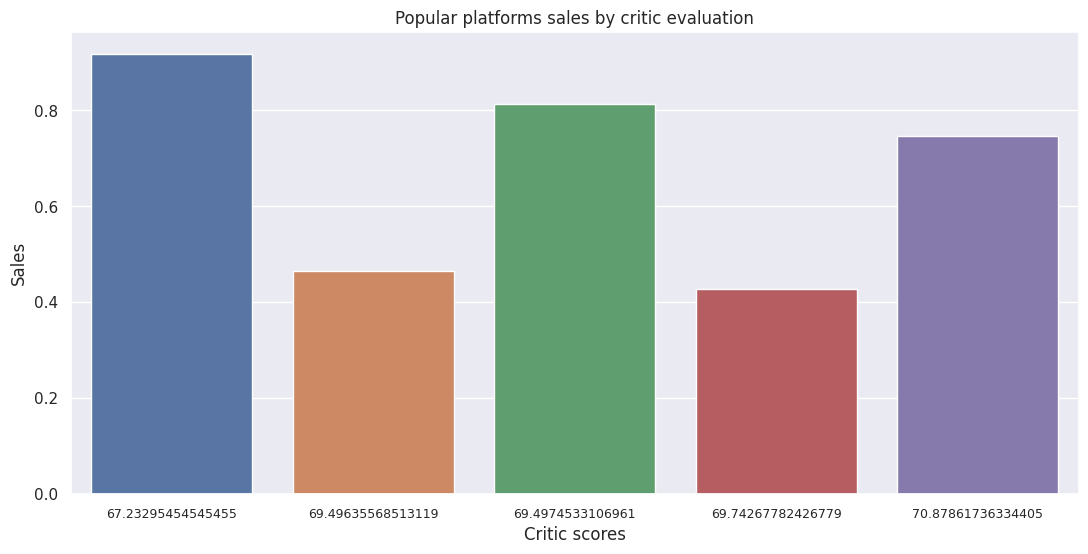

In [239]:
# Gráfico de barra da relação entre avaliação dos críticos e as vendas
fig, ax= plt.subplots(figsize=(13,6))
sns.barplot( x='critic_score', y='total_sales', ax=ax, data=sales_critic_score)
plt.xlabel('Critic scores');
plt.ylabel('Sales');
plt.title('Popular platforms sales by critic evaluation');
plt.xticks(rotation='horizontal', fontsize=9);

Não há correlação entre as avaliações e as vendas 

**Distribuição geral de jogos por gênero**

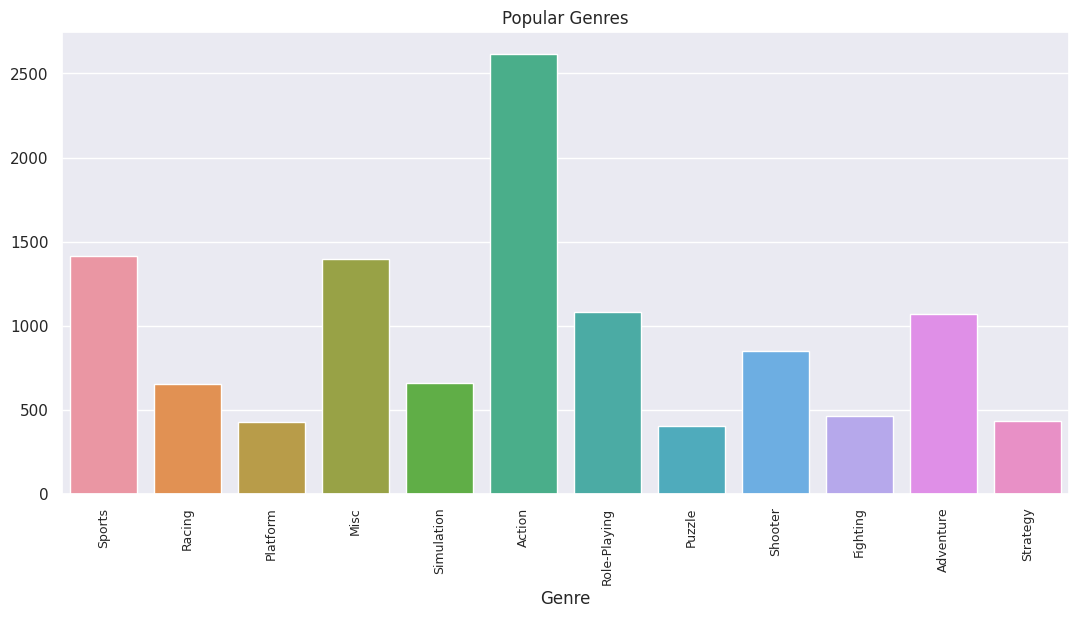

In [253]:
fig, ax= plt.subplots(figsize=(13,6))
sns.countplot(x='genre', ax=ax, data=df_range_years)
plt.xlabel('Genre');
plt.ylabel('');
plt.title('Popular Genres');
plt.xticks(rotation='vertical', fontsize=9);
plt.show()

In [273]:
genre_sales = df_range_years.groupby('genre')['total_sales'].mean().reset_index()
genre_sales

,genre,total_sales
0,Action,0.467052
1,Adventure,0.140215
2,Fighting,0.457322
3,Misc,0.449355
4,Platform,0.708695
5,Puzzle,0.274728
6,Racing,0.549174
7,Role-Playing,0.512313
8,Shooter,0.899682
9,Simulation,0.411561


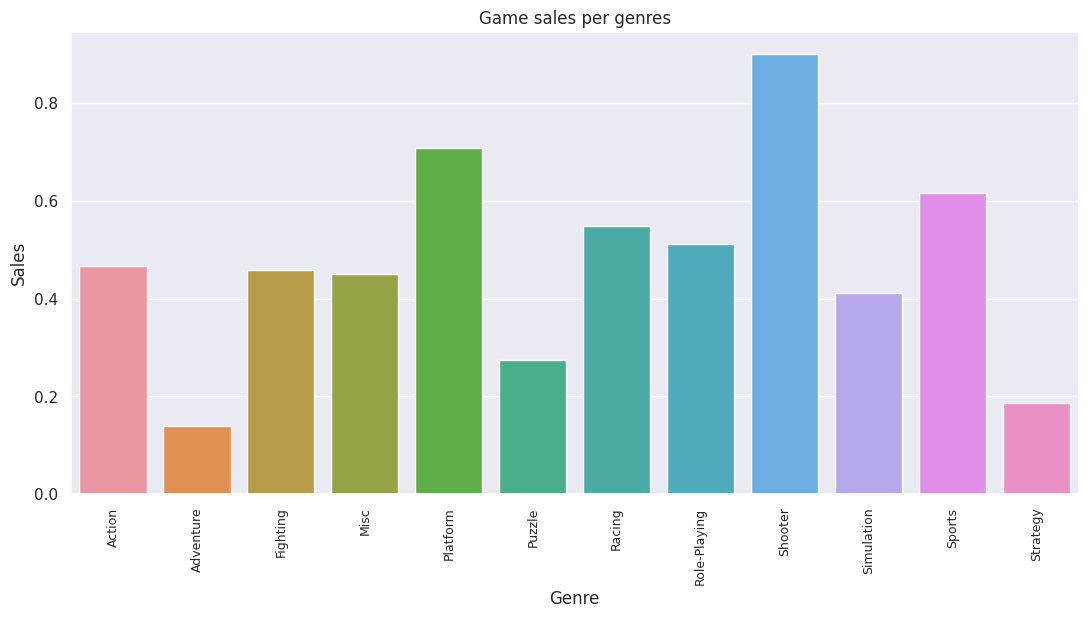

In [274]:
fig, ax= plt.subplots(figsize=(13,6))
sns.barplot(x='genre', y='total_sales', ax=ax,  data=genre_sales)
plt.xlabel('Genre');
plt.ylabel('Sales');
plt.title('Game sales per genres');
plt.xticks(rotation='vertical', fontsize=9);
plt.show()

Shooter games are the best sellers.

Shooter, platform and sports games are the ones with the highest revenue average.

# Profile of users by region

**Top 5 platforms by region**

In [267]:
df_regions = df_range_years.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
df_regions.sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending=False)

,na_sales,eu_sales,jp_sales
platform,,,
X360,602.47,270.76,12.43
Wii,496.90,262.21,69.33
PS3,393.49,330.29,80.19
DS,374.07,184.96,171.90
PS2,211.41,93.80,52.64
PS4,108.74,141.09,15.96
PSP,106.92,64.98,74.75
XOne,93.12,51.59,0.34
3DS,83.49,61.48,100.67


From the ordering of the data we can see that the five most popular platforms in the 3 regions are: x360, wii, PS3, DS and PS2

In [276]:
# Filtering dataframe by main platforms
df_platform_regions = df_range_years[df_range_years['platform'].isin(["X360", "Wii", "PS3", "DS", "PS2"])]

In [277]:
# Checking result
df_platform_regions.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,6.9,E,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [283]:
# Reordering dataframe for chart building
df_melt_platform = pd.melt(df_platform_regions, id_vars=['platform'], value_vars=['na_sales', 'eu_sales', 'jp_sales'])
# Checking result
df_melt_platform

,platform,variable,value
0,Wii,na_sales,41.36
1,Wii,na_sales,15.68
2,Wii,na_sales,15.61
3,DS,na_sales,11.28
4,Wii,na_sales,13.96
...,...,...,...
21412,DS,jp_sales,0.01
21413,DS,jp_sales,0.00
21414,PS2,jp_sales,0.00
21415,PS3,jp_sales,0.01


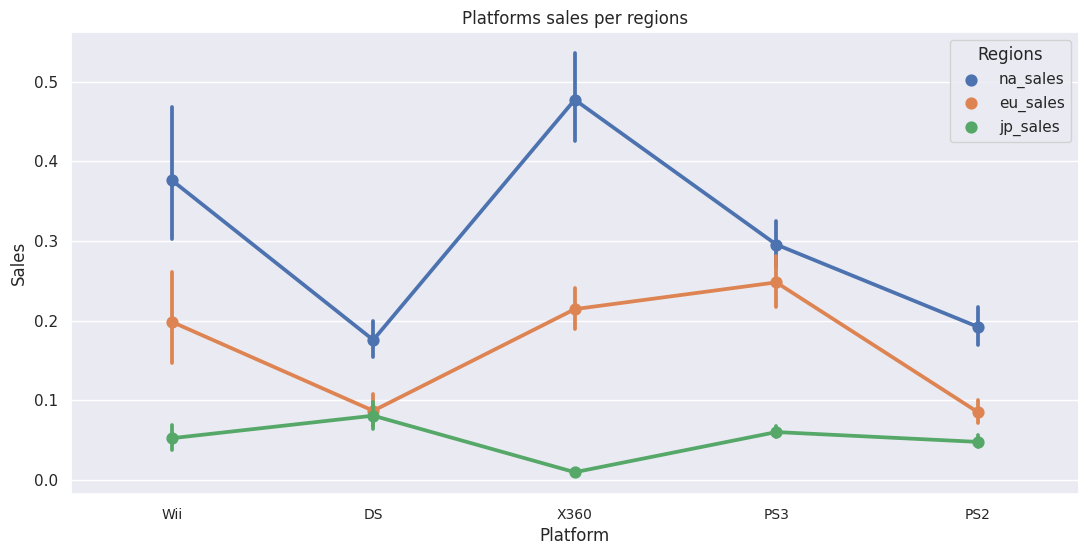

In [285]:
fig, ax = plt.subplots(figsize=(13,6));
sns.pointplot(x='platform', y='value', hue='variable', ax=ax, data=df_melt_platform);
plt.xlabel('Platform');
plt.ylabel('Sales');
plt.title('Platforms sales per regions');
plt.xticks(fontsize=10);
plt.legend(title='Regions')
plt.show()

North America has a higher sales of consoles than other regions.

The sequence of best-selling consoles by region is:
* North America: X360, Wii, PS3, PS2 and DS.
* Europe: PS3, X360, Wii, DS and PS2
* Japan: DS, PS3, PS2, Wii and X360


**Top Genres by Region**

In [287]:
df_genre = df_range_years.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
df_genre.sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending=False)

,genre,na_sales,eu_sales,jp_sales
0,Action,589.79,378.96,109.41
10,Sports,442.69,270.16,52.95
8,Shooter,404.05,250.38,20.75
3,Misc,318.54,169.06,73.58
7,Role-Playing,212.61,115.99,181.22
6,Racing,165.20,130.91,17.65
4,Platform,149.97,87.52,36.44
9,Simulation,128.47,86.19,32.49
2,Fighting,106.48,48.24,31.88
1,Adventure,66.86,39.95,30.29


Sorting the dataframe we see that the main genres are: Action, sport, shooter, miscellaneous and role-playing.

In [288]:
# Filtering dataframe
df_genre_regions = df_range_years[df_range_years['genre'].isin(["Action", "Sports", "Shooter", "Misc", "Role-Playing"])]

In [289]:
# Reordering dataframe
df_melt_regions = pd.melt(df_genre_regions, id_vars=['genre'], value_vars=['na_sales', 'eu_sales', 'jp_sales'])

In [290]:
# Checking result
df_melt_regions

,genre,variable,value
0,Sports,na_sales,41.36
1,Sports,na_sales,15.61
2,Misc,na_sales,13.96
3,Sports,na_sales,8.92
4,Misc,na_sales,15.00
...,...,...,...
22057,Sports,jp_sales,0.01
22058,Role-Playing,jp_sales,0.01
22059,Misc,jp_sales,0.01
22060,Action,jp_sales,0.01


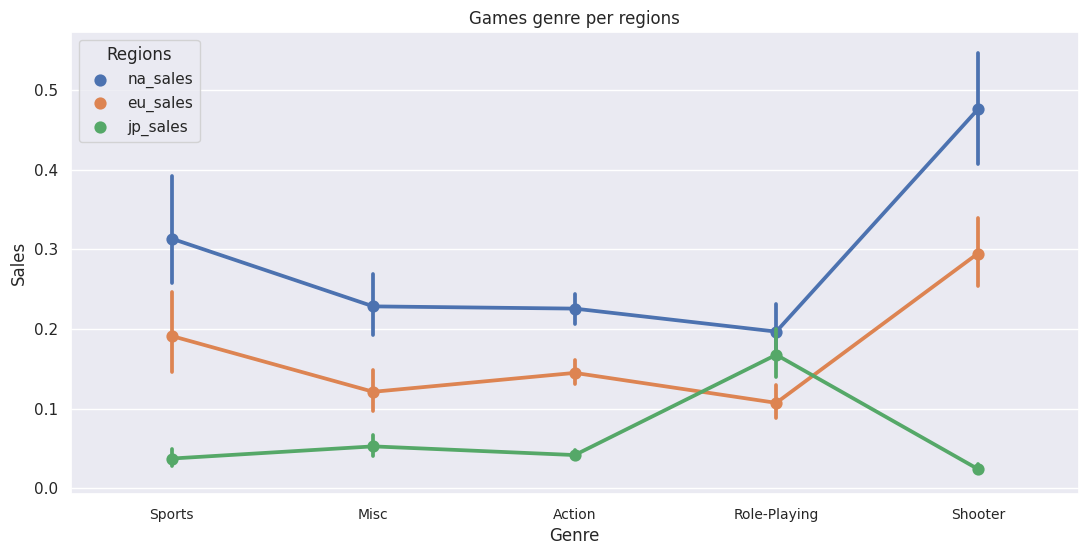

In [291]:
fig, ax = plt.subplots(figsize=(13,6));
sns.pointplot(x='genre', y='value', hue='variable', ax=ax, data=df_melt_regions);
plt.xlabel('Genre');
plt.ylabel('Sales');
plt.title('Games genre per regions');
plt.xticks(fontsize=10);
plt.legend(title='Regions')
plt.show()

The sequence of best-selling game genres by region is:
* North America: shooter, sports, misc, action and role-playing
* Europe: shooter, sports, action, misc and role-playing
* Japan: role-playing, misc, action, sports and shooter


**Classification of games by regions**

In [292]:
df_rating = df_range_years.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
df_rating.sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending=False)

,rating,na_sales,eu_sales,jp_sales
1,E,1036.59,657.39,260.85
5,M,641.30,439.95,50.33
7,T,634.60,351.87,270.54
2,E10+,350.71,187.04,39.05
3,EC,1.53,0.11,0.00
0,AO,1.26,0.61,0.00
6,RP,0.00,0.08,0.00
4,K-A,0.00,0.00,0.00


The main genres sold are:

E - Everyone (Over 6 years old or free), M - Mature, T- Teen, E10+ - Everyone 10+ (Over 10 years old), EC - Early Childhood (Up to 3 years old)

In [293]:
# Filtering dataframe
df_rating_grouped = df_rating[df_rating['rating'].isin(["E", "M", "T", "E10+", "EC"])]

In [295]:
# Checking result
df_rating_grouped

,rating,na_sales,eu_sales,jp_sales
1,E,1036.59,657.39,260.85
2,E10+,350.71,187.04,39.05
3,EC,1.53,0.11,0.00
5,M,641.30,439.95,50.33
7,T,634.60,351.87,270.54


In [296]:
# Organizing dataframe
df_rating_melt = pd.melt(df_rating_grouped, id_vars=['rating'], value_vars=['na_sales', 'eu_sales', 'jp_sales'])

In [297]:
# Checking result
df_rating_melt

,rating,variable,value
0,E,na_sales,1036.59
1,E10+,na_sales,350.71
2,EC,na_sales,1.53
3,M,na_sales,641.30
4,T,na_sales,634.60
5,E,eu_sales,657.39
6,E10+,eu_sales,187.04
7,EC,eu_sales,0.11
8,M,eu_sales,439.95
9,T,eu_sales,351.87


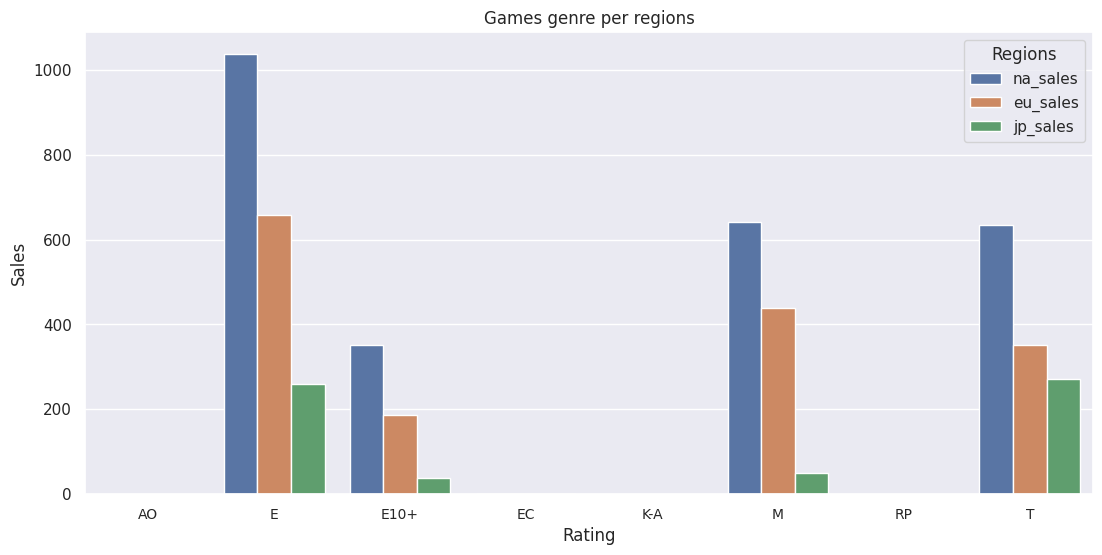

In [298]:
fig, ax = plt.subplots(figsize=(13,6));
sns.barplot(x='rating', y='value', hue='variable', ax=ax, data=df_rating_melt);
plt.xlabel('Rating');
plt.ylabel('Sales');
plt.title('Games genre per regions');
plt.xticks(fontsize=10);
plt.legend(title='Regions')
plt.show()

Both in North America and Europe the best selling games are rated E, M, T and finally E10+.

In Japan the main gender is T, followed by E, M and finally E10+.

# Hypothesis test

* Are the average user ratings of Xbox One and PC platforms the same?
     * H0 -> Average user ratings for Xbox One and PC platforms are the same
     * Ha -> The average user ratings of Xbox One and PC platforms are different
* Alpha = 5%

In [299]:
# Filtering dataframe that doesn't contain 'tbd' values
df_filtered_platform = df_range_years[df_range_years['user_score'] != -99.0]

In [300]:
# Filtering and passing to dataframe variable with information about XOne
user_score_xone = df_filtered_platform[df_filtered_platform['platform'] == 'XOne']['user_score']
# Checking results
user_score_xone

99       6.9
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16597    6.0
16630    8.2
16643    6.6
16645    6.9
16660    6.7
Name: user_score, Length: 236, dtype: float64

In [301]:
# Filtrando e passando para variável dataframe com informações sobre PC
user_score_pc = df_filtered_platform[df_filtered_platform['platform'] == 'PC']['user_score']
user_score_pc

85       7.6
192      4.0
218      8.2
288      7.9
313      8.1
        ... 
16690    6.9
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 783, dtype: float64

In [302]:
# Storing the value of alpha 5% in the alpha variable
alpha = 0.05
# Calling the t-test function for independent samples and storing it in the result variable
result = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)

print('p-value: %.10f' % result.pvalue)

if result.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

p-value: 0.0030538606
We reject the null hypothesis.


We can say that the average rating of users of Xbox One and PC platforms are not the same.

* Are the average user ratings for the Action and Sports genres different?
     * H0 -> Average user ratings for Action and Sports genres are equal
     * Ha -> Average user ratings for Action and Sports genres are different
* Alpha: 5%

In [303]:
user_score_action = df_filtered_platform[df_filtered_platform['genre'] == 'Action']['user_score']
user_score_action

16       8.2
23       8.1
42       8.3
46       6.9
51       7.9
        ... 
16680    6.9
16691    6.9
16692    7.6
16699    6.9
16710    6.9
Name: user_score, Length: 2327, dtype: float64

In [304]:
user_score_sports = df_filtered_platform[df_filtered_platform['genre'] == 'Sports']['user_score']
user_score_sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16643    6.6
16656    6.9
16676    6.9
16700    6.9
16711    6.9
Name: user_score, Length: 1132, dtype: float64

In [305]:
# Storing the value of alpha 5% in the alpha variable
alpha = 0.05
# Calling the t-test function for independent samples and storing it in the result variable
result = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)

print('p-value: %.10f' % result.pvalue)

if result.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula.")
else:
    print("Nós não podemos rejeitar a hipótese nula.")

p-value: 0.0000000100
Nós rejeitamos a hipótese nula.


We can infer that the average rating of users regarding action and sports games are not equal.

# General conclusion

**Based on the analyzes carried out, we can raise the following points:**

* As the years passed more games were released and the peak of releases was between 2005 and 2011.

* The platforms that generated the most revenue were: PS2, X360, PS3 and DS. Even after filtering data at the given time of 2005 and 2016, the same platforms remained at the top. The Wii console had an important share of sales in 2005 and 2016.

* Regarding the behavior of the platforms' sales, it seems to be a natural course for the platforms to stop selling as versions of the same console are released. Except for the X360 platform, which was not replaced by XOne, until the year 2016.

* The most profitable platforms are: PS3, X360 and Wii.

* Ratings from critics and users don't seem to affect game sales.

* Action games are the biggest sellers. And the most profitable games are: Shooter, platform and sports.

* Regarding the profile of users by region:
     * North America saw the highest game sales.
     * Users in North America and Europe have similar behavior: they bought more shooter and sports games, while in Japan role-playing games are the ones that sell the most.
     * In North America and Europe, the best-selling game rankings are mainly E (Everyone) and M (Mature). And in Japan the preference category is T (Teen) and E (Everyone).

* Finally, it was found that it is likely that the average user rating of Xbox One and PC platforms are not the same, and the average user rating of action and sports games are not the same.